# 7.1 深度卷积神经网络（AlexNet）
- **目录**
  - 7.1.1 学习表征
    - 7.1.1.1 缺少的成分：数据
    - 7.1.1.2 缺少的成分：硬件
  - 7.1.2 AlexNet
    - 7.1.2.1 模型设计
    - 7.1.2.2 激活函数
    - 7.1.2.3 容量控制和预处理
  - 7.1.3 读取数据集
  - 7.1.4 训练AlexNet

在LeNet提出后，卷积神经网络在计算机视觉和机器学习领域中很有名气。但卷积神经网络并没有主导这些领域。这是因为虽然LeNet在小数据集上取得了很好的效果，但是在更大、更真实的数据集上训练卷积神经网络的性能和可行性还有待研究。事实上，在上世纪90年代初到2012年之间的大部分时间里，神经网络往往被其他机器学习方法超越，如**支持向量机（support vector machines）**。

在计算机视觉中，直接将神经网络与其他机器学习方法进行比较也许不公平。这是因为，**卷积神经网络的输入是由原始像素值或是经过简单预处理（例如居中、缩放）的像素值组成的。但在使用传统机器学习方法时，一般来说不会将原始像素作为输入**。在传统机器学习方法中，计算机**视觉流水线**是由经过人的**手工精心设计的特征流水线**组成的。对于这些传统方法，大部分的进展都来自于对特征有了更聪明的想法，并且学习到的算法往往归于事后的解释。

虽然上世纪90年代就有了一些神经网络加速卡，但仅靠它们还不足以开发出有大量参数的深层多通道多层卷积神经网络。此外，当时的数据集仍然相对较小。除了这些障碍，训练神经网络的一些关键技巧仍然缺失，包括**启发式参数初始化、随机梯度下降的变体、非挤压激活函数和有效的正则化技术**。


因此，与训练**端到端**（从像素到分类结果）系统不同，经典机器学习的**流水线**看起来更像下面这样：

1. 获取一个有趣的**数据集**。在早期，收集这些数据集需要昂贵的传感器（在当时最先进的图像也就100万像素）。
2. 根据光学、几何学、其他知识以及偶然的发现，**手工对特征数据集进行预处理**。
3. 通过标准的**特征提取算法**，如SIFT（尺度不变特征变换）和SURF（加速鲁棒特征）或其他手动调整的流水线来输入数据。
4. 将提取的特征送入最喜欢的**分类器**中（例如线性模型或其它核方法），以训练分类器。

如果你和机器学习研究人员交谈，你会发现他们相信机器学习既重要又美丽：优雅的理论去证明各种模型的性质。机器学习是一个正在蓬勃发展、严谨且非常有用的领域。然而，如果你和计算机视觉研究人员交谈，你会听到一个完全不同的故事。他们会告诉你图像识别的诡异事实————**推动领域进步的是数据特征，而不是学习算法**。计算机视觉研究人员相信，从对最终模型精度的影响来说，更大或更干净的数据集、或是稍微改进的特征提取，比任何学习算法带来的进步要大得多。

- **要点：**
  - 虽然LeNet在小数据集上取得了成功，但在更大、更真实的数据集上训练卷积神经网络的性能和可行性仍待研究。
  - 在LeNet之后的几十年里，卷积神经网络并未在计算机视觉和机器学习领域占据主导地位，部分原因是这些领域中其他方法（如支持向量机）的发展。
  - 计算机视觉流水线中，传统机器学习方法依赖人工设计的特征提取，而不像卷积神经网络那样使用原始像素作为输入。
  - 在上世纪90年代，尽管出现了一些神经网络加速卡，但由于缺乏关键技巧（如启发式参数初始化、随机梯度下降变体、非挤压激活函数和有效正则化技术），它们还不足以支持大量参数的深层多通道多层卷积神经网络的开发。
  - 当时的数据集相对较小，限制了卷积神经网络在计算机视觉任务中的应用。
  - 传统机器学习流水线包括：获取数据集、手动预处理特征数据集、使用标准特征提取算法（如SIFT和SURF）输入数据，以及将提取的特征送入分类器进行训练。
  - 计算机视觉研究人员普遍认为，推动领域进步的主要是**数据特征的改进**，而不是学习算法本身。
  

--------------------
- **说明：**
- （1）何为**手工精心设计的特征流水线**？
  - 手工精心设计的特征流水线是指在传统机器学习方法中，为了从图像或其他数据中提取有意义的信息（特征），研究者们依赖于领域知识、经验和直觉，手动设计一系列的处理步骤。
  - 这些特征可以帮助分类器更好地区分不同类别的对象。
  - 手工设计的特征提取方法通常会对输入图像进行一系列操作，例如滤波、变换、检测关键点等，最终生成一个描述图像内容的特征向量。
  - 在传统的计算机视觉任务中，特征流水线（Feature Pipeline）是指从原始图像数据中提取有用的特征，以便后续的机器学习算法可以更好地进行分类、回归或其他任务。
  - 特征流水线通常包括以下几个步骤：
    - **预处理（Preprocessing）**：对图像进行基本的处理，如灰度化、去噪、归一化等。
    - **特征提取（Feature Extraction）**：从图像中提取有用的特征，如边缘、纹理、形状、颜色直方图等。
    - **特征选择（Feature Selection）**：选择最有用的特征，减少特征的维度，去除冗余信息。
    - **特征变换（Feature Transformation）**：将特征进行变换，如PCA（主成分分析）等，以便于后续的机器学习算法更好地处理。
  - 在传统方法中，特征提取是一个非常关键的步骤，通常需要专家根据具体的任务设计特征提取方法。
  - 举例来说，以下是一些建立在手工设计特征基础上的算法：
    - **SIFT**（尺度不变特征变换）：SIFT（Scale-Invariant Feature Transform）是由David Lowe于2004年提出的一种用于图像特征提取的方法。SIFT主要包括四个阶段：**尺度空间极值检测、关键点定位、方向分配和特征描述**。通过这些步骤，SIFT提取了一组具有尺度、旋转和部分视角不变性的关键点描述符。这些描述符可以用于图像匹配、物体识别和场景稳定等任务。
    - **SURF**（加速鲁棒特征）：SURF（Speeded-Up Robust Features）是一种类似于SIFT的特征提取方法，由Herbert Bay等人于2006年提出。SURF旨在加速特征提取过程，同时保持良好的性能。SURF通过使用**近似算法**和**积分图像**来简化关键点检测和描述符计算。与SIFT相比，SURF在计算效率上有明显优势，同时在许多任务中仍具有可比的性能。
    - **HOG**（方向梯度直方图）：HOG（Histogram of Oriented Gradients）是一种用于目标检测任务（如行人检测）的特征描述符，由Navneet Dalal和Bill Triggs于2005年提出。HOG通过计算图像局部区域的**梯度方向直方图**来构建特征描述符。这些局部直方图然后连接成一个大型特征向量，用于训练分类器（例如支持向量机）进行目标检测。
  - 相比之下，现代的深度学习方法（如卷积神经网络）能够**自动从数据中学习到特征**。
  - **图像处理的教材《数字图像处理》**
<center><img src='../img/7_1_3.png' width=300px></center> 

- （2）何为**非挤压激活函数？**
    - **非挤压激活函数（non-squashing activation functions）** 是指一类不会将输入值挤压到一个固定的范围内的激活函数。
    - 这些激活函数通常允许其输出值在更广泛的范围内变化，而不是像传统的挤压型激活函数（如Sigmoid和Tanh）那样将输出限制在(0, 1)或(-1, 1)之间。
    - 以下是一些非挤压激活函数的例子：
      - **ReLU（Rectified Linear Unit）**：ReLU函数是深度学习中最常用的非挤压激活函数之一。它的数学表示为：f(x) = max(0, x)，即当输入值x大于0时，函数值为x本身；否则，函数值为0。ReLU函数允许正数范围内的值保持不变，从而避免了梯度消失问题。然而，负数部分的梯度为0，可能导致神经元“死亡”。
      - **Leaky ReLU**：Leaky ReLU是ReLU的一个变体，旨在解决“死亡神经元”问题。它的数学表示为：f(x) = max(αx, x)，其中α是一个很小的正数（如0.01），表示对于负数输入值，函数的斜率不再为0，而是有一个**较小的正值**。这样，即使输入值为负数，梯度仍然可以传播，避免了神经元“死亡”。
      - **Parametric ReLU（PReLU）**：PReLU是Leaky ReLU的一种扩展，其中α变成一个可学习的参数。这意味着网络将在训练过程中学习最佳的α值。其数学表示为：f(x) = max(αx, x)，其中α是一个可学习的参数。
      - **Exponential Linear Unit（ELU）**：ELU是另一种非挤压激活函数，它对于负数输入采用指数形式。

  - （3）何为**端到端系统**？
    - **端到端（End-to-end）** 系统是指在机器学习和深度学习领域中，一个完整的模型或系统可以**直接从原始输入数据（例如图像、文本或音频）生成期望的输出结果（例如分类标签、文本翻译或语音识别结果）**，而无需在输入和输出之间进行任何手动特征提取或处理。
    - 这意味着端到端系统负责**自动学习输入数据的表示和处理方式**，以实现从输入到输出的映射。
    - 端到端系统的优势在于**能够自动学习数据的表示**，减少了对人工特征工程的依赖和潜在偏见。
    - 通常需要大量的训练数据来实现高性能，并且可能比基于手工特征的方法更难以解释。
    - 以下是一些端到端系统的例子：
      * 图像分类：在计算机视觉任务中，端到端卷积神经网络（CNN）可以直接从原始像素值学习特征，然后将这些特征用于图像分类。
        * 例如，AlexNet、VGG、ResNet等都是端到端的图像分类网络，它们直接使用未经人工预处理的原始图像作为输入，并输出相应的类别标签。
      - 语音识别：端到端的语音识别系统，如DeepSpeech，可以直接将音频信号作为输入，并生成对应的文本输出。
        - 这种端到端系统避免了传统的语音识别流程，如声学模型、发音模型和语言模型的单独训练和组合。
      - 机器翻译：神经机器翻译（NMT）系统，如seq2seq模型，是一种端到端的翻译方法。它们可以直接从输入语言的文本学习语义表示，并生成目标语言的文本输出，而无需进行复杂的预处理和后处理。
      - 自动驾驶汽车：自动驾驶汽车中的许多深度学习系统也可以视为端到端系统。例如，一个端到端的自动驾驶模型可以直接从摄像头捕获的图像中学习行驶策略，而无需手动提取道路、车辆或行人等特征。

  - （4）**计算机图像处理中的特征提取示例**：

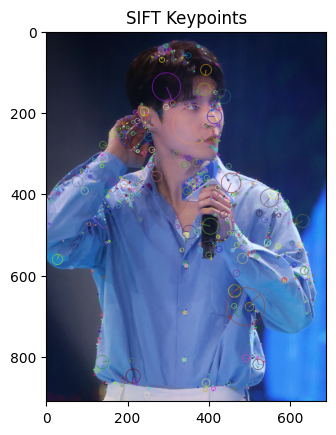

In [1]:
import cv2
import matplotlib.pyplot as plt

# 读取图像
image = cv2.imread('../img/6_5_1.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 创建SIFT对象
sift = cv2.SIFT_create()

# 检测SIFT特征点并计算描述符
keypoints, descriptors = sift.detectAndCompute(gray, None)

# 绘制关键点
image_with_keypoints = cv2.drawKeypoints(image, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# 显示结果
plt.imshow(cv2.cvtColor(image_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title('SIFT Keypoints')
plt.show()


----------------

## 7.1.1 学习表征

另一种预测这个领域发展的方法————**观察图像特征的提取方法**。在2012年前，图像特征都是机械地计算出来的。事实上，设计一套新的特征函数、改进结果，并撰写论文是盛极一时的潮流。SIFT、SURF、HOG（定向梯度直方图）、[bags of visual words](https://en.wikipedia.org/wiki/Bag-of-words_model_in_computer_vision)和类似的特征提取方法占据了主导地位。

另一组研究人员，包括Yann LeCun、Geoffrey Hinton、Yoshua Bengio、Andrew Ng、Shun ichi Amari和Juergen Schmidhuber，想法则与众不同：他们认为**特征本身应该被学习**。此外，他们还认为，在合理地复杂性前提下，**特征应该由多个共同学习的神经网络层组成，每个层都有可学习的参数**。在机器视觉中，最底层可能**检测边缘、颜色和纹理**。事实上，Alex Krizhevsky、Ilya Sutskever和Geoffrey Hinton提出了一种新的卷积神经网络变体**AlexNet**。在2012年ImageNet挑战赛中取得了轰动一时的成绩。AlexNet以Alex Krizhevsky的名字命名。

有趣的是，在网络的最底层，模型学习到了一些类似于传统滤波器的特征抽取器。 图7.1.1描述了底层图像特征。
<center>
    <img src="../img/filters.png" alt="AlexNet第一层学习到的特征抽取器">
</center>
<center>
    图7.1.1 AlexNet第一层学习到的特征抽取器
</center>
AlexNet的更高层建立在这些底层表示的基础上，以表示更大的特征，如眼睛、鼻子、草叶等等。而更高的层可以检测整个物体，如人、飞机、狗或飞盘。最终的隐藏神经元可以学习图像的综合表示，从而使属于不同类别的数据易于区分。尽管一直有一群执着的研究者不断钻研，试图学习视觉数据的逐级表征，然而很长一段时间里这些尝试都未有突破。深度卷积神经网络的突破出现在2012年。突破可归因于两个关键因素: <b>大量可用数据和计算能力的提升</b> 。

- **要点：**
  - 2012年之前，图像特征提取主要依赖于手工设计的特征函数，例如SIFT、SURF、HOG（定向梯度直方图）和bags of visual words等。
  - 一些研究人员（如Yann LeCun、Geoff Hinton、Yoshua Bengio、Andrew Ng等）主张**特征本身应该被学习**，而且应该由多个共同学习的神经网络层组成，每个层都有可学习的参数。
  - 在机器视觉中，最底层可能检测边缘、颜色和纹理。更高层可以表示更大的特征（如眼睛、鼻子等），再高层可以检测整个物体（如人、飞机等）。
  - AlexNet是一种卷积神经网络变体，其在2012年ImageNet挑战赛中取得了显著成绩。它的第一层学习到了类似于传统滤波器的特征抽取器。
  - 深度卷积神经网络的突破出现在2012年，主要归因于两个关键因素：大量可用数据和计算能力的提升。

### 7.1.1.1 缺少的成分：数据

**包含许多特征的深度模型需要大量的有标签数据，才能显著优于基于凸优化的传统方法（如线性方法和核方法）**。
然而，限于早期计算机有限的存储和90年代有限的研究预算，大部分研究只基于小的公开数据集。例如，不少研究论文基于加州大学欧文分校（UCI）提供的若干个公开数据集，其中许多数据集只有几百至几千张在非自然环境下以低分辨率拍摄的图像。这一状况在2010年前后兴起的大数据浪潮中得到改善。2009年，ImageNet数据集发布，并发起ImageNet挑战赛：要求研究人员从100万个样本中训练模型，以区分1000个不同类别的对象。ImageNet数据集由斯坦福教授李飞飞小组的研究人员开发，利用谷歌图像搜索（Google Image Search）对每一类图像进行预筛选，并利用亚马逊众包（Amazon Mechanical Turk）来标注每张图片的相关类别。这种规模是前所未有的。这项被称为ImageNet的挑战赛推动了计算机视觉和机器学习研究的发展，挑战研究人员确定哪些模型能够在更大的数据规模下表现最好。

- **要点：**
  - 包含许多特征的深度模型需要大量的有标签数据，才能显著优于基于凸优化的传统方法（如线性方法和核方法）。
  - 早期计算机存储有限，研究预算有限，导致大部分研究只基于小的公开数据集，如加州大学欧文分校（UCI）提供的数据集。
  - 2010年前后，大数据浪潮兴起，改善了数据规模的局限。2009年，ImageNet数据集发布，并发起ImageNet挑战赛，要求从100万个样本中训练模型，区分1000个不同类别的对象。
  - ImageNet数据集由斯坦福教授李飞飞小组的研究人员开发，利用谷歌图像搜索对每一类图像进行预筛选，并利用亚马逊众包来标注每张图片的相关类别。
  - ImageNet挑战赛推动了计算机视觉和机器学习研究的发展，挑战研究人员确定哪些模型能够在更大的数据规模下表现最好。

### 7.1.1.2 缺少的成分：硬件

深度学习对计算资源要求很高，训练可能需要数百个迭代轮数，每次迭代都需要通过代价高昂的许多线性代数层传递数据。这也是为什么在20世纪90年代至21世纪初，优化凸目标的简单算法是研究人员的首选。然而，用GPU训练神经网络改变了这一格局。**图形处理器（Graphics Processing Unit，GPU）**早年用来加速图形处理，使电脑游戏玩家受益。GPU可优化高吞吐量的$4 \times 4$矩阵和向量乘法，从而服务于基本的图形任务。幸运的是，这些数学运算与卷积层的计算惊人地相似。由此，英伟达（NVIDIA）和ATI已经开始为通用计算操作优化GPU，甚至把它们作为**通用GPU（general-purpose GPUs，GPGPU）来销售**。

那么GPU比CPU强在哪里呢？

首先，我们深度理解一下中央处理器（Central Processing Unit，CPU）的**核心**。
CPU的每个核心都拥有高时钟频率的运行能力，和高达数MB的三级缓存（L3Cache）。
它们非常适合**执行各种指令**，具有分支预测器、深层流水线和其他使CPU能够运行各种程序的功能。
然而，这种明显的优势也是它的致命弱点：**通用核心的制造成本非常高**。
它们需要大量的芯片面积、复杂的支持结构（内存接口、内核之间的缓存逻辑、高速互连等等），而且它们在任何单个任务上的性能都相对较差。
**现代笔记本电脑最多有4核，即使是高端服务器也很少超过64核，因为它们的性价比不高**(注：到视频制作日期，intel的i9 cpu最新一代能有24核)。

相比于CPU，**GPU由$100 \sim 1000$个小的处理单元组成**（NVIDIA、ATI、ARM和其他芯片供应商之间的细节稍有不同），通常被分成更大的组（NVIDIA称之为warps）。
虽然每个GPU核心都相对较弱，有时甚至以低于1GHz的时钟频率运行，但庞大的核心数量使GPU比CPU快几个数量级。
例如，NVIDIA最近一代的Ampere GPU架构A100的80G版芯片提供了高达312 TFlops的浮点性能（注：准确讲在BFLOAT16 Tensor Core上为312 TFlops，在INT8 Tensor Core上甚至可达624 TFlops，但是FP32即单精度浮点上仍为为19.5 TFlops。其CUDA 核心数为6,912个，432个第三代Tensor核心。具体可参看[此网址](https://www.edomtech.com/en/product-detail/nvidia-a100-80gb-pcie-gpu/)）。CPU的浮点性能到目前为止还没有超过1 TFlops。（注：截止2024年9月，英伟达最新的GPU架构是Blackwell，据称其在FP64上为45TFlops。）

之所以有如此大的差距，原因其实很简单：首先，功耗往往会随时钟频率呈二次方增长。
对于一个CPU核心，假设它的运行速度比GPU快4倍，你可以使用16个GPU内核取代，那么GPU的综合性能就是CPU的$16 \times 1/4 = 4$倍。
其次，GPU内核要简单得多，这使得它们更节能。
此外，深度学习中的许多操作需要相对较高的内存带宽，而**GPU拥有10倍于CPU的带宽**。

回到2012年的重大突破，当Alex Krizhevsky和Ilya Sutskever实现了可以在GPU硬件上运行的深度卷积神经网络时，一个重大突破出现了。他们意识到卷积神经网络中的计算瓶颈：卷积和矩阵乘法，都是可以在硬件上并行化的操作。
于是，他们使用两个显存为3GB的NVIDIA GTX580 GPU实现了快速卷积运算。他们的创新[cuda-convnet](https://code.google.com/archive/p/cuda-convnet/)几年来它一直是行业标准，并推动了深度学习热潮。

- **要点：**
  - 深度学习对计算资源要求很高，需要进行数百个迭代轮次，每次迭代都需要通过许多线性代数层传递数据，此种计算方式代价高昂。
  - 用GPU训练神经网络改变了这一格局。GPU早年用于加速图形处理，后来被优化为通用计算操作，并被称为通用GPU（GPGPU）。
  - GPU相较于CPU具有更多的小型处理单元，虽然每个GPU核心相对较弱，但庞大的核心数量使得GPU的性能比CPU快几个数量级。
  - 在深度学习中，许多操作需要较高的内存带宽，而GPU拥有相较于CPU更高的带宽。
  - 2012年，Alex Krizhevsky和Ilya Sutskever实现了可以在GPU硬件上运行的深度卷积神经网络，认识到卷积神经网络中的计算瓶颈，如卷积和矩阵乘法，都是可以在硬件上并行化的操作。
  - 他们使用两个显存为3GB的NVIDIA GTX580 GPU实现了快速卷积运算，创立了cuda-convnet，成为行业标准，并推动了深度学习热潮。

- **说明：何为混合精度训练？**
    - **混合精度训练**是一种在神经网络训练中同时使用不同数值精度（例如，单精度浮点数和半精度浮点数）的技术。这样做的目的是在保持模型性能（准确性）的同时，提高计算效率、加速训练过程并减少内存需求。
    - 在混合精度训练中，通常将权重和激活值表示为低精度浮点数（如FP16），而梯度和权重更新则使用较高精度的浮点数（如FP32）。使用低精度数据类型可以加速计算过程，因为它们需要更少的内存带宽和存储空间。
    - 而使用较高精度的浮点数进行梯度和权重更新有助于**防止数值不稳定性和精度损失**。

## 7.1.2 AlexNet

2012年，AlexNet出现，它首次证明了学习到的特征可以超越手工设计的特征， 打破了计算机视觉研究的现状。

AlexNet使用了8层卷积神经网络，并以很大的优势赢得了2012年ImageNet图像识别挑战赛。

AlexNet和LeNet的架构非常相似，如图7.1.2所示。

注意，这里我们提供了一个稍微精简版本的AlexNet，去除了当年需要两个小型GPU同时运算的设计特点。

<center>
    <img src="../img/alexnet.svg" alt="从LeNet（左）到AlexNet（右）">
</center>
<center>
    图7.1.2 从LeNet（左）到AlexNet（右）
</center>

**AlexNet的构成**：

- 首先，AlexNet比相对较小的LeNet5要深得多。
  - AlexNet由八层组成：五个卷积层、两个全连接隐藏层和一个全连接输出层。
- 其次，AlexNet使用ReLU而不是sigmoid作为其激活函数。


### 7.1.2.1 模型设计

- 在AlexNet的第一层，卷积窗口的形状是$11\times11$。
  - 由于ImageNet中大多数图像的宽和高比MNIST图像的多10倍以上，因此，**需要一个更大的卷积窗口来捕获目标**。
- 第二层中的卷积窗口形状被缩减为$5\times5$，然后是$3\times3$。
- 在第一层、第二层和第五层卷积层之后，加入窗口形状为$3\times3$、步幅为2的最大池化层。
- AlexNet的卷积通道数目是LeNet的10倍。
- 在最后一个卷积层后有两个全连接层，分别有4096个输出。
  - 这两个巨大的全连接层拥有将近1GB（10亿个）的模型参数。
- 由于早期GPU显存有限，原版的AlexNet采用了双数据流设计，使得每个GPU只负责存储和计算模型的一半参数。
  - 幸运的是，现在GPU显存相对充裕，所以我们现在很少需要跨GPU分解模型（因此，我们的AlexNet模型在这方面与原始论文稍有不同）。

### 7.1.2.2 激活函数

- AlexNet将sigmoid激活函数改为更简单的**ReLU激活函数**。
- 一方面，ReLU激活函数的计算更简单，它不需要如sigmoid激活函数那般复杂的求幂运算。
- 另一方面，当使用不同的参数初始化方法时，ReLU激活函数使训练模型更加容易。
- 当sigmoid激活函数的输出非常接近于0或1时，这些区域的梯度几乎为0，因此反向传播无法继续更新一些模型参数。
- 相反，ReLU激活函数在正区间的梯度总是1。
- 因此，如果模型参数没有正确初始化，sigmoid函数可能在正区间内得到几乎为0的梯度，从而使模型无法得到有效的训练。

### 7.1.2.3 容量控制和预处理

- AlexNet通过暂退法（4.6节）控制全连接层的模型复杂度，而LeNet只使用了权重衰减。
- 为了进一步扩充数据，AlexNet在训练时增加了大量的**图像增强（Image augmentation）** 数据，如翻转、裁切和变色。
  - 这使得模型更健壮，更大的样本量有效地减少了过拟合。
- 将在13.1节中更详细地讨论数据增广。

In [3]:
%matplotlib inline
import torch
torch.cuda.current_device()
from torch import nn
from d2l import torch as d2l
import numpy as np
net = nn.Sequential(
    # 这里，我们使用一个11*11的更大窗口来捕捉对象。
    # 同时，步幅为4，以减少输出的高度和宽度。
    # 另外，输出通道的数目远大于LeNet
    ## 96也代表卷积核的数量
    nn.Conv2d(1, 96, kernel_size=11, stride=4, padding=1), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    # 减小卷积窗口，使用填充为2来使得输入与输出的高和宽一致，且增大输出通道数
    ## 输出通道数变成256，同时该数字也代表本卷积层的卷积核数量
    nn.Conv2d(96, 256, kernel_size=5, padding=2), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    # 使用三个连续的卷积层和较小的卷积窗口。
    # 除了最后的卷积层，输出通道的数量进一步增加。
    # 在前两个卷积层之后，池化层不用于减少输入的高度和宽度
    nn.Conv2d(256, 384, kernel_size=3, padding=1), nn.ReLU(),
    nn.Conv2d(384, 384, kernel_size=3, padding=1), nn.ReLU(),
    nn.Conv2d(384, 256, kernel_size=3, padding=1), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    ## 展平操作很重要，用于后面的全连接层操作
    nn.Flatten(),
    # 这里，全连接层的输出数量是LeNet中的好几倍。使用dropout层来减轻过拟合
    nn.Linear(6400, 4096), nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(4096, 4096), nn.ReLU(),
    nn.Dropout(p=0.5),
    # 最后是输出层。由于这里使用Fashion-MNIST，所以用类别数为10，而非论文中的1000
    nn.Linear(4096, 10))

- 高度和宽度都为224的**单通道数据，来观察每一层输出的形状**，与图7.1.2中的AlexNet架构相匹配。


In [4]:
X = torch.randn(1, 1, 224, 224)
for layer in net:
    X=layer(X)
    print(layer.__class__.__name__,'output shape:\t',X.shape)

Conv2d output shape:	 torch.Size([1, 96, 54, 54])
ReLU output shape:	 torch.Size([1, 96, 54, 54])
MaxPool2d output shape:	 torch.Size([1, 96, 26, 26])
Conv2d output shape:	 torch.Size([1, 256, 26, 26])
ReLU output shape:	 torch.Size([1, 256, 26, 26])
MaxPool2d output shape:	 torch.Size([1, 256, 12, 12])
Conv2d output shape:	 torch.Size([1, 384, 12, 12])
ReLU output shape:	 torch.Size([1, 384, 12, 12])
Conv2d output shape:	 torch.Size([1, 384, 12, 12])
ReLU output shape:	 torch.Size([1, 384, 12, 12])
Conv2d output shape:	 torch.Size([1, 256, 12, 12])
ReLU output shape:	 torch.Size([1, 256, 12, 12])
MaxPool2d output shape:	 torch.Size([1, 256, 5, 5])
Flatten output shape:	 torch.Size([1, 6400])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1,

## 7.1.3 读取数据集

- AlexNet是在ImageNet上进行训练的，但此处使用的是Fashion-MNIST数据集
  - 因为即使在现代GPU上，训练ImageNet模型，同时使其收敛可能需要数小时或数天的时间。
- 将AlexNet直接应用于Fashion-MNIST的一个问题是，**Fashion-MNIST图像的分辨率**（$28 \times 28$像素）**低于ImageNet图像。**
- 为了解决这个问题，**将它们增加到$224 \times 224$**（通常来讲这不是一个明智的做法，但我们在这里这样做是为了有效使用AlexNet架构）。
- 可使用`d2l.load_data_fashion_mnist`函数中的`resize`参数执行此调整。


In [3]:
## 原值等于128，PC机上收敛时间过长，将小批量大小改成32勉强可以运行
# batch_size = 32
batch_size = 128 # 在一块3090ti上毫无压力
## 注意resize参数用法
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=224)

## 7.1.4 训练AlexNet

- 与6.6节中的LeNet相比，这里的主要变化是使用**更小的学习速率训练**，这是因为网络更深更广、图像分辨率更高，训练卷积神经网络就更昂贵。


In [1]:
## 将batch_size从128改成32之后，pc上运行明显好转。但是训练速度仍是很慢，需要更强的GPU
## num_epochs原值为10，训练收敛时间太长，如果需要再pc机上运行，改成1试试
import time
start = time.time()
lr, num_epochs = 0.01, 10
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())
end = time.time()
print(f'原模型在3090ti上训练耗时：{int(np.floor((end-start)/60))}分钟{(int(end-start)%60) }秒')

 <img src="../img/7_1_2.png" alt="描述图像的文本" width="350" height="300">

## 小结

* AlexNet的架构与LeNet相似，但使用了更多的卷积层和更多的参数来拟合大规模的ImageNet数据集。
* 今天，AlexNet已经被更有效的架构所超越，但它是从浅层网络到深层网络的关键一步。
* 尽管AlexNet的代码只比LeNet多出几行，但学术界花了很多年才接受深度学习这一概念，并应用其出色的实验结果。这也是由于缺乏有效的计算工具。
* <b>Dropout、ReLU和预处理是提升计算机视觉任务性能的其他关键步骤。